In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

data = pd.read_excel("OSA_extreme_both.xlsx")

#data = pd.read_excel("OSA_extreme_both.xlsx")

Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [ ]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import absolute
import numpy as np
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# summarize shape
print(data.shape)
# summarize first few lines
print(data.head())
x_names = ['Gender','Weight','Height','Smoker','Snorer','BMI','Age','Cervical']
X=data[x_names]
y=data[['IAH']]

X=X.values
y=y.values

scalerX = StandardScaler()
scalerX.fit(X)
X = scalerX.transform(X)

alphas= np.arange(0, 1, 0.05).tolist()
means = []
stds = []
for alpha in alphas:

  # define model
  model = ElasticNet(alpha=alpha,max_iter=10000)
  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  model.fit(X,y)
  # force scores to be positive
  scores = absolute(scores)
  print('Alpha: %.1f Mean MSE: %.3f (%.3f)' % (alpha,mean(scores), std(scores)))
  means.append(mean(scores))
  stds.append(std(scores))
  

(412, 10)
   Gender   IAH  Weight  Height  ...  Smoker  Snorer        BMI      OSA
0       2  71.0    82.0     168  ...       1       3  29.053288   Severe
1       2   9.0    80.0     173  ...       4       3  26.729927  Healthy
2       2   2.0   109.0     190  ...       4       3  30.193906  Healthy
3       2  34.0    86.0     169  ...       4       3  30.110991   Severe
4       2  60.0   145.0     172  ...       4       3  49.012980   Severe

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.75802252062024, tolerance: 0.041199999999999994
  positive)


Alpha: 0.0 Mean MSE: 0.838 (0.110)
Alpha: 0.1 Mean MSE: 0.839 (0.105)
Alpha: 0.1 Mean MSE: 0.842 (0.106)
Alpha: 0.2 Mean MSE: 0.848 (0.107)
Alpha: 0.2 Mean MSE: 0.857 (0.108)
Alpha: 0.2 Mean MSE: 0.867 (0.109)
Alpha: 0.3 Mean MSE: 0.876 (0.111)
Alpha: 0.4 Mean MSE: 0.886 (0.113)
Alpha: 0.4 Mean MSE: 0.894 (0.115)
Alpha: 0.5 Mean MSE: 0.903 (0.118)
Alpha: 0.5 Mean MSE: 0.911 (0.120)
Alpha: 0.6 Mean MSE: 0.921 (0.123)
Alpha: 0.6 Mean MSE: 0.930 (0.126)
Alpha: 0.7 Mean MSE: 0.940 (0.128)
Alpha: 0.7 Mean MSE: 0.950 (0.130)
Alpha: 0.8 Mean MSE: 0.959 (0.131)
Alpha: 0.8 Mean MSE: 0.968 (0.132)
Alpha: 0.9 Mean MSE: 0.976 (0.134)
Alpha: 0.9 Mean MSE: 0.985 (0.135)
Alpha: 1.0 Mean MSE: 0.991 (0.134)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.75802252062024, tolerance: 0.041199999999999994
  positive)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


[array([ 0.0424207 ,  1.19253144, -0.6173971 ,  0.01159353,  0.11866915,
       -0.80366849,  0.15980513,  0.30976355]), array([ 0.        ,  0.09021986, -0.        ,  0.        ,  0.09406292,
        0.1410482 ,  0.14418948,  0.30313997]), array([ 0.        ,  0.08677395, -0.        ,  0.        ,  0.06883336,
        0.12950281,  0.1196796 ,  0.28190507]), array([ 0.        ,  0.08163236, -0.        ,  0.        ,  0.04484455,
        0.11895175,  0.09589988,  0.26228125]), array([ 0.        ,  0.07551585, -0.        , -0.        ,  0.02198066,
        0.10896062,  0.0729333 ,  0.24388279]), array([ 0.00000000e+00,  6.88160877e-02,  0.00000000e+00, -0.00000000e+00,
        1.49393801e-04,  9.93137422e-02,  5.07988825e-02,  2.26473080e-01]), array([ 0.        ,  0.05914235,  0.        , -0.        ,  0.        ,
        0.09006127,  0.0284281 ,  0.21209633]), array([ 0.        ,  0.04977827,  0.        , -0.        ,  0.        ,
        0.08077816,  0.00701002,  0.19808056]), array([

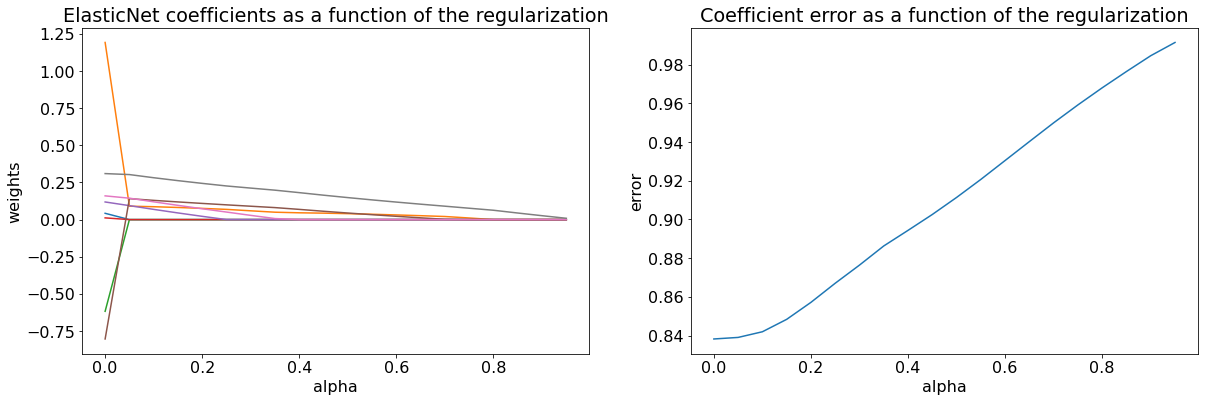

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

coefs = []
errors = []
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    errors.append(abs(mean(scores)))
# Display results
print(coefs)
print(len(coefs[0]))
plt.figure(figsize=(20, 6))

plt.subplot(121)
for i in range(8):
  plt.plot(alphas, [item[i] for item in coefs])
#plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ElasticNet coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
#ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()